<a href="https://colab.research.google.com/github/nandakhairunnisa/202055202025-AnandaK/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.sitepoint.com/keras-digit-recognition-tutorial/


In [2]:
import numpy as np

def create_scaler(*args):
  min_d = np.min(args[0])
  max_d = np.max(args[0])
  for partition in args:
    if np.min(partition) < min_d:
      min_d = np.min(partition)
    if np.max(partition) > max_d:
      max_d = np.max(partition)
  return [min_d, max_d]

def normalizer(scaler, df):
  min_d = scaler[0]
  max_d = scaler[1]
  normalized_df = (df - min_d) / (max_d - min_d)
  return normalized_df

def denormalizer(scaler, normalized_df):
  min_d = scaler[0]
  max_d = scaler[1]
  denormalized_df = normalized_df * (max_d - min_d) + min_d
  return denormalized_df

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


5


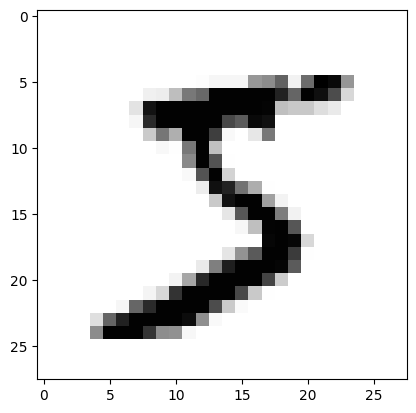

In [5]:
#show one image with label
print(y_train[0])
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
#change shape to IMAGES only for CNN input
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
#the labels are already in an acceptable shape

In [7]:
#normalize image data only
scaler = create_scaler([0, 255])
X_train_ = normalizer(scaler, X_train)
X_test_ = normalizer(scaler, X_test)

In [8]:
#DEPRECATED: normalize, identical to the new method
import numpy as np
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)
X_train /= 255
X_test /= 255

In [11]:
'''
#se lo si attiva, il modello si sputtana
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#y sono i labels one_hot: [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]
'''

'\n#se lo si attiva, il modello si sputtana\nfrom keras.utils import to_categorical\nnum_classes = 10\n\ny_train = to_categorical(y_train, num_classes)\ny_test = to_categorical(y_test, num_classes)\n#y sono i labels one_hot: [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]\n'

In [12]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1))) #image size
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #number of classes

model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

batch_size = 128
epochs = 10

model.fit(X_train_, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 - 117s - loss: 0.2441 - accuracy: 0.9250 - val_loss: 0.0577 - val_accuracy: 0.9819 - 117s/epoch - 249ms/step
Epoch 2/10
469/469 - 115s - loss: 0.0896 - accuracy: 0.9742 - val_loss: 0.0405 - val_accuracy: 0.9868 - 115s/epoch - 245ms/step
Epoch 3/10
469/469 - 116s - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0334 - val_accuracy: 0.9884 - 116s/epoch - 247ms/step
Epoch 4/10
469/469 - 115s - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0338 - val_accuracy: 0.9887 - 115s/epoch - 244ms/step
Epoch 5/10
469/469 - 115s - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0298 - val_accuracy: 0.9905 - 115s/epoch - 245ms/step
Epoch 6/10
469/469 - 114s - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0284 - val_accuracy: 0.9910 - 114s/epoch - 243ms/step
Epoch 7/10
469/469 - 115s - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0295 - val_accuracy: 0.9902 - 115s/epoch - 246ms/step
Epoch 8/10
469/469 - 114s - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0314 - val_accuracy: 0.9906 - 

In [13]:
#   summarize model_1
#input layer not included
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

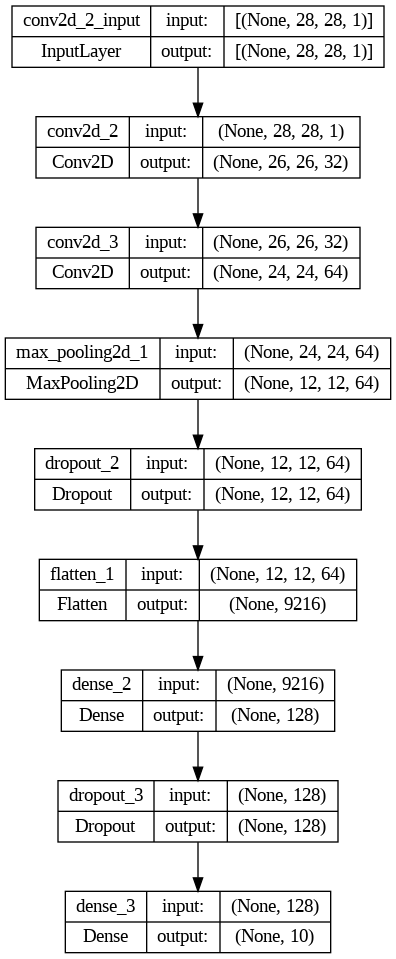

In [14]:
#   summarize model_2
#input layer is included
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

<ipython-input-15-8dc6d5f9498a>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread("https://i.imgur.com/a3Rql9C.png")


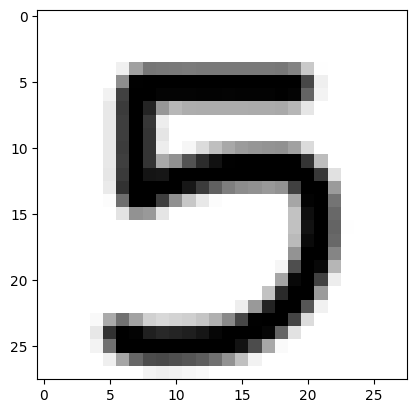

In [16]:
#visualize image
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [17]:
# reshape the image
gray = gray.reshape(1, 28, 28, 1)

# normalize image
gray /= 255

In [18]:
#predict digit in x_train
prediction = model.predict(X_test[0].reshape(1, 28, 28, 1))
print(y_test[0], prediction.argmax())

1/1 [==============================] - 0s 102ms/step
7 7


7


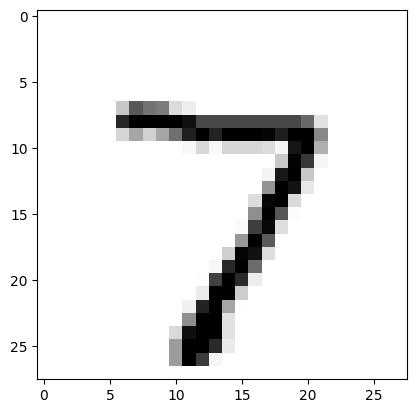

In [19]:
print(y_test[0])
plt.imshow(X_test[0], cmap='Greys')
plt.show()

In [20]:
#predict digit from img
prediction = model.predict(gray)
print(prediction.argmax())

1/1 [==============================] - 0s 23ms/step
5
